# GPM data analysis

### Packages Required
1. Numpy, Xarray, DrPy, Matplotlib, Cartopy and so on... by running the command in your terminal/command prompt as given below
> conda install -c conda-forge cartopy xarray git
2. Install DrPy
> pip install git+https://github.com/dopplerchase/DRpy.git

### Import these installed packages

In [1]:
import numpy as np
import h5py                  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# import netCDF4 as nc
import xarray as xr
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
def gline(ax):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, 
                         linestyle='--', draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right=False
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

In [4]:
#install drpy
!pip install git+https://github.com/dopplerchase/DRpy.git

  Cloning https://github.com/dopplerchase/DRpy.git to /private/var/folders/vr/4xwzfzr92_v2npmgfxdnq9vh0000gn/T/pip-req-build-12tweu8t


  Running command git clone --filter=blob:none --quiet https://github.com/dopplerchase/DRpy.git /private/var/folders/vr/4xwzfzr92_v2npmgfxdnq9vh0000gn/T/pip-req-build-12tweu8t


  Resolved https://github.com/dopplerchase/DRpy.git to commit 7d4246d977e926d02b19059de0a0c3793711e2f1


  Preparing metadata (setup.py) ... -

 \

 |

 /

 done


In [5]:
import drpy
import datetime as dt

In [6]:
dt.datetime(2021,5,15,20,43)

datetime.datetime(2021, 5, 15, 20, 43)

### Download Level 2 GPM data
create your PPS account here :
>https://registration.pps.eosdis.nasa.gov/registration/

In [7]:
io = drpy.io.netrunner(servername='Research',username='hamidsyed37@gmail.com',
                       start_time=dt.datetime(2021,5,15,20,43),
                      end_time=dt.datetime(2021,5,15,22,17))

Downloading: https://arthurhouhttps.pps.eosdis.nasa.gov/text/gpmdata/2021/05/15/radar/2A.GPM.DPR.V9-20211125.20210515-S204332-E221604.040979.V07A.HDF5


KeyboardInterrupt: 

In [8]:
file = '2A.GPM.DPR.V9-20211125.20210515-S204332-E221604.040979.V07A.HDF5'

### Read the data
Reading data by using DrPy library

In [9]:
dpr = drpy.core.GPMDPR(filename=file)

### Data analysis
Let's have a look at the data

In [10]:
dpr.ds

<xarray.Dataset>
Dimensions:                    (nscan: 7932, nrayNS: 49, nfreq: 2, nbin: 176,
                                nNUBF: 3, nNP: 4, method: 2, foreBack: 6,
                                nearFar: 3, nsdew: 2, nfreqHI: 3, nbinSZP: 7)
Coordinates:
    Latitude                   (nscan, nrayNS) float32 ...
    Longitude                  (nscan, nrayNS) float32 ...
    height                     (nscan, nrayNS, nbin) float32 ...
    time                       (nscan, nrayNS) datetime64[ns] 2021-05-15T20:4...
Dimensions without coordinates: nscan, nrayNS, nfreq, nbin, nNUBF, nNP, method,
                                foreBack, nearFar, nsdew, nfreqHI, nbinSZP
Data variables: (12/96)
    sunLocalTime               (nscan, nrayNS) float32 ...
    elevation                  (nscan, nrayNS) float32 ...
    landSurfaceType            (nscan, nrayNS) int32 ...
    localZenithAngle           (nscan, nrayNS, nfreq) float32 ...
    flagPrecip                 (nscan, nrayNS) int32 ...
    flagSigmaZeroSaturation    (nscan, nrayNS, nfreq) uint8 ...
    ...                         ...
    surfaceSnowfallIndex       (nscan, nrayNS) float32 ...
    flagEcho                   (nscan, nrayNS, nbin) int8 ...
    qualityData                (nscan, nrayNS) int32 ...
    qualityFlag                (nscan, nrayNS, nfreq) int8 ...
    flagSensor                 (nscan, nfreq) int8 ...
    flagScanPattern            (nscan, nfreq) int16 ...
Attributes:
    FS_SwathHeader:  NumberScansInSet=1;\nMaximumNumberScansTotal=10000;\nNum...

In [11]:
dpr.ds['zFactorFinal']

<xarray.DataArray 'zFactorFinal' (nscan: 7932, nrayNS: 49, nbin: 176, nfreq: 2)>
[136811136 values with dtype=float32]
Coordinates:
    Latitude   (nscan, nrayNS) float32 ...
    Longitude  (nscan, nrayNS) float32 ...
    height     (nscan, nrayNS, nbin) float32 ...
    time       (nscan, nrayNS) datetime64[ns] 2021-05-15T20:43:33.633000 ... ...
Dimensions without coordinates: nscan, nrayNS, nbin, nfreq
Attributes:
    DimensionNames:    nscan,nray,nbin,nfreq
    Units:             dBZ
    units:             dBZ
    _FillValue:        -9999.9
    CodeMissingValue:  -9999.9

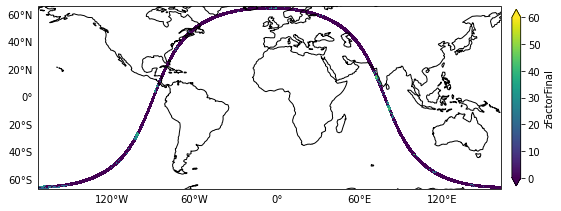

In [12]:
fig = plt.figure(figsize = [10,6.5])
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
dpr.ds['zFactorFinal'].isel(nfreq=0).max(axis=2).plot(x = "Longitude", 
                                                      y = "Latitude", 
                                                      vmin = 0, 
                                                      vmax = 60, 
                                                      cbar_kwargs = {"pad":0.02,
                                                                     "shrink":0.5
                                                                    } 
                                                     )
gline(ax)

### Slicing the data
Now if you see there are four dimensions in this dataset viz.,
when you type dpr.ds['zFactorFinal']
>(nscan: 7932, nrayNS: 49, nbin: 176, nfreq: 2)</p>
1. The above figure shows that the GPM satellite travels in between latitudes ranging from 60ºS to 60ºN by making a sinwave like pattern around the globe.
2. This sinwave like pattern is called as the swath of the satellite (you can call it a path as well)
3. This swath is basically the data of reflectivity (dBZ)
4. If we plot this without this map or PlateCarre projection the data will look like as plotted below
5. It shows us that the "nscan" dimension is x-axis and "nrayNS" is y-axis and similarly "nbin" is the height or z-axis
6. We can also note that there is much data only as few lines, so let's see what it is, so if we slice "nscan" somewhere between 5000 to 6000, we can see the Cyclone Tauktae over Indian ocean, because the GPM has passed over the Indian Ocean and we can clearly see that there are some data patches present over the region.

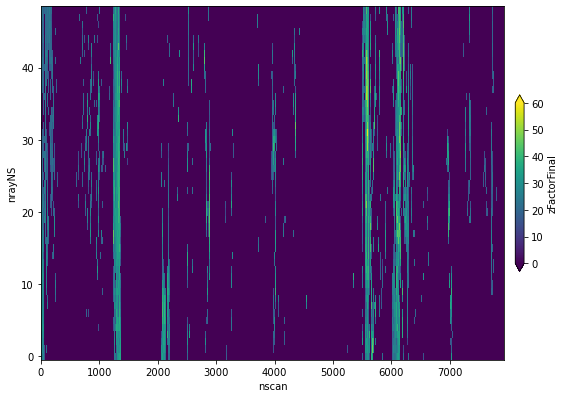

In [13]:
fig = plt.figure(figsize = [10,6.5])
ax = plt.axes()
dpr.ds['zFactorFinal'].isel(nfreq=0).max(axis=2).plot(x = "nscan",
                                                      vmin = 0, 
                                                      vmax = 60, 
                                                      cbar_kwargs = {"pad":0.02,
                                                                     "shrink":0.5
                                                                    } 
                                                     )

In [14]:
start = 5550
end = 5630

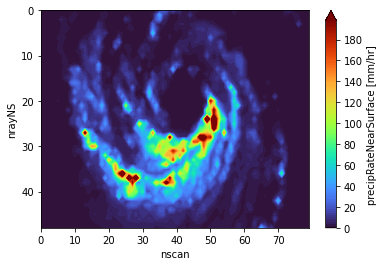

In [15]:
dpr.ds['precipRateNearSurface'][start:end,:].plot.contourf(x='nscan',levels=range(0,200,2),cmap='turbo')
plt.gca().invert_yaxis()

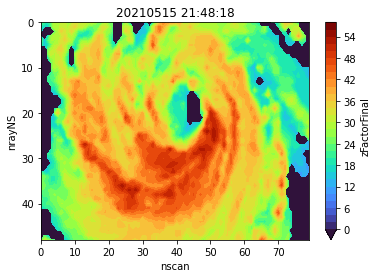

In [16]:
dpr.ds['zFactorFinal'].isel(nscan=slice(start,end),nfreq=1).max(axis=2).plot.contourf(x='nscan',
                                                                                            levels=range(0,60,2),
                                                                                           cmap='turbo')
plt.title(pd.to_datetime(dpr.ds['zFactorFinal'].isel(nscan=slice(start,end),nfreq=1).time[0,0].values).strftime(
    '%Y%m%d %H:%M:%S'))
plt.gca().invert_yaxis()

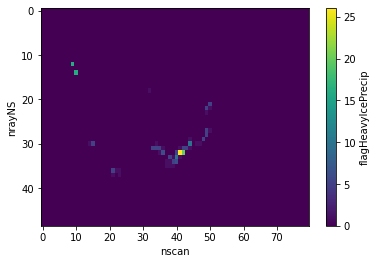

In [17]:
dpr.ds['flagHeavyIcePrecip'][start:end].plot(x = "nscan")
plt.gca().invert_yaxis()

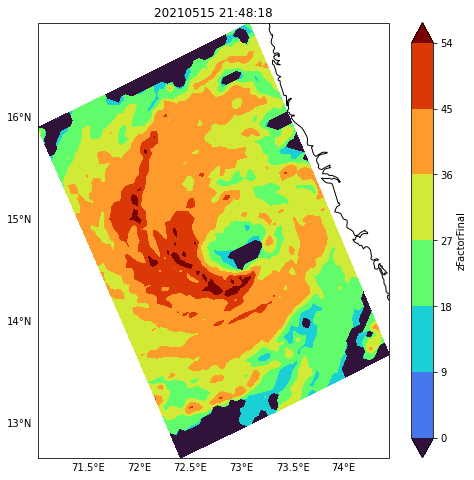

In [18]:
plt.figure(figsize=[8,8])
ax = plt.axes(projection=ccrs.PlateCarree())
dpr.ds['zFactorFinal'][start:end,:,:,0].max(axis=2).plot.contourf(x='Longitude',y='Latitude',levels=range(0,60,9),
                                                        cmap='turbo')
ax.set_title(pd.to_datetime(dpr.ds['zFactorFinal'][start:end,:,160,0].time[0,0].values).strftime('%Y%m%d %H:%M:%S'))
ax.coastlines()
gline(ax)
